In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/kayo-mest/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [ ]:
wholesale_prices = pd.read_csv("./cleaned/super_dataframe.csv",encoding = "latin")
rainfall = pd.read_csv("pr_1991_2016_GHA.csv")
temperature = pd.read_csv("Monthly Average Temperature in Ghana.csv")
temperature_2 = pd.read_csv("tas_1991_2016_GHA.csv")

In [2]:
crops = ['MAIZE', 'MILLET', 'LOCAL RICE', 'SORGHUM', 'YAM', 'COCOYAM']

In [3]:
crop_array = {
    'MAIZE':1,
    'MILLET':2,
    'LOCAL RICE':3,
    'SORGHUM':4,
    'YAM':5,
    'COCOYAM':6
}

In [4]:
df = pd.read_csv("./cleaned/wholesale_prices_with_temp_and_rainfall.csv")
df.rename(columns={'PRICE, ¢ GH':'Price'},inplace=True)
df.head()

,DATE,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG",Price,Temperature (C),Rainfall - (MM)
0,1991-01-01,1991,1,MAIZE,100,1.080,27.671963,9.81577
1,1991-01-01,1991,1,MILLET,93,187.100,27.671963,9.81577
2,1991-01-01,1991,1,LOCAL RICE,100,0.050,27.671963,9.81577
3,1991-01-01,1991,1,SORGHUM,109,6.917,27.671963,9.81577
4,1991-01-01,1991,1,YAM,250,57.261,27.671963,9.81577


In [5]:
df.tail()

,DATE,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG",Price,Temperature (C),Rainfall - (MM)
1867,2016-12-01,2016,12,MILLET,93,18.408,28.0134,20.8897
1868,2016-12-01,2016,12,LOCAL RICE,100,260.000,28.0134,20.8897
1869,2016-12-01,2016,12,SORGHUM,109,0.020,28.0134,20.8897
1870,2016-12-01,2016,12,YAM,250,424.690,28.0134,20.8897
1871,2016-12-01,2016,12,COCOYAM,91,182.850,28.0134,20.8897


In [6]:
df['COMMODITY'] = df.COMMODITY.map(crop_array)
df.head()

,DATE,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG",Price,Temperature (C),Rainfall - (MM)
0,1991-01-01,1991,1,1,100,1.080,27.671963,9.81577
1,1991-01-01,1991,1,2,93,187.100,27.671963,9.81577
2,1991-01-01,1991,1,3,100,0.050,27.671963,9.81577
3,1991-01-01,1991,1,4,109,6.917,27.671963,9.81577
4,1991-01-01,1991,1,5,250,57.261,27.671963,9.81577


In [7]:
df.describe()

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG",Price,Temperature (C),Rainfall - (MM)
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000
mean,2003.493590,6.500000,3.500000,123.833333,29829.511194,27.608542,95.996609
std,7.499864,3.452975,1.708281,56.734984,110069.350559,1.466123,64.286123
min,1991.000000,1.000000,1.000000,91.000000,0.007000,24.942990,0.000000
25%,1997.000000,3.750000,2.000000,93.000000,5.641250,26.378470,29.219425
50%,2003.500000,6.500000,3.500000,100.000000,37.596000,27.323602,107.470500
75%,2010.000000,9.250000,5.000000,109.000000,217.147500,28.850001,145.107500
max,2016.000000,12.000000,6.000000,250.000000,920550.000000,30.795456,243.271000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 8 columns):
DATE                  1872 non-null object
YEAR                  1872 non-null int64
MONTH                 1872 non-null int64
COMMODITY             1872 non-null int64
WEIGHT, KG PER BAG    1872 non-null int64
Price                 1872 non-null float64
Temperature (C)       1872 non-null float64
Rainfall - (MM)       1872 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 117.1+ KB


In [9]:
arr = df.COMMODITY.unique()

In [10]:
split_df = {}

In [11]:
for item in arr:
    split_df.update({item:df[df.COMMODITY==item]})

In [12]:
split_df.keys()

dict_keys([1, 2, 3, 4, 5, 6])

In [13]:
# plt.figure()
# plt.plot(df['Year'],df['Price'])

/home/kayo-mest/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


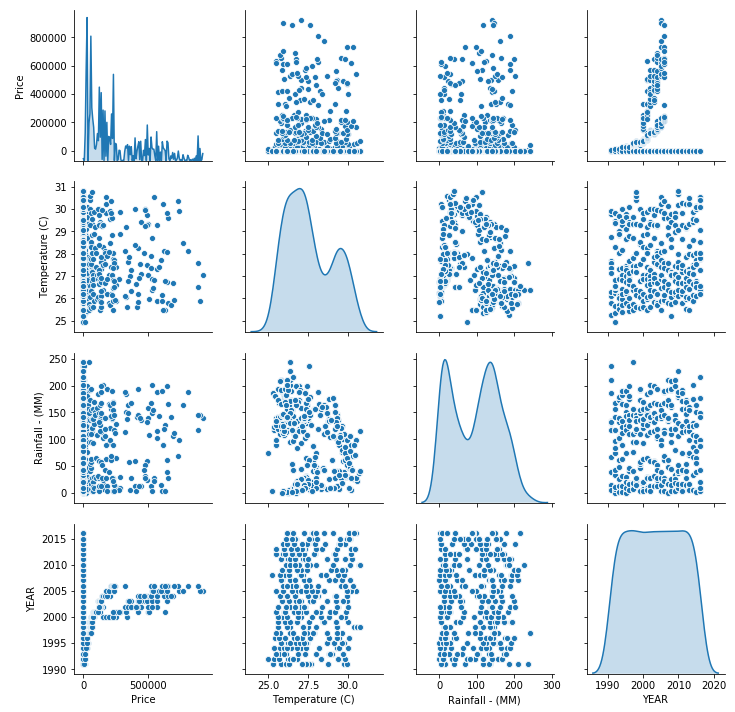

In [14]:
sns.pairplot(df[['Price','Temperature (C)','Rainfall - (MM)','YEAR']], diag_kind='kde')

### Get data ready for model

In [27]:
df.drop(['DATE'], axis=1,inplace=True)
train_data = df.sample(frac=0.8,random_state=0)
test_data = df.drop(train_data.index)

KeyError: "['DATE'] not found in axis"

In [29]:
df.drop('WEIGHT, KG PER BAG',axis=1,inplace=True)

In [31]:
df.head()

,YEAR,MONTH,COMMODITY,Price,Temperature (C),Rainfall - (MM)
0,1991,1,1,1.080,27.671963,9.81577
1,1991,1,2,187.100,27.671963,9.81577
2,1991,1,3,0.050,27.671963,9.81577
3,1991,1,4,6.917,27.671963,9.81577
4,1991,1,5,57.261,27.671963,9.81577


In [32]:
df.to_csv('./cleaned/super_dataframe.csv')

In [16]:
train_labels = train_data.pop('Price')
test_labels = test_data.pop('Price')

### Model stuff

In [26]:
[len(train_data.keys())]

[6]

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mean_squared_error',
            optimizer=optimizer,
            metrics=['accuracy'])


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [20]:
example_batch = train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[238.68004],
       [239.38705],
       [234.49164],
       [234.3538 ],
       [236.65245],
       [235.28458],
       [245.92873],
       [240.24408],
       [234.9868 ],
       [241.14554]], dtype=float32)

In [23]:
history = model.fit(
  train_data, train_labels,
  epochs=100)

Epoch 1/100
1498/1498 [==============================] - 0s 31us/step - loss: 10845124580.6569 - acc: 6.6756e-04
Epoch 2/100
1498/1498 [==============================] - 0s 31us/step - loss: 10826695956.8491 - acc: 6.6756e-04
Epoch 3/100
1498/1498 [==============================] - 0s 26us/step - loss: 10812253018.5741 - acc: 6.6756e-04
Epoch 4/100
1498/1498 [==============================] - 0s 23us/step - loss: 10796726449.7303 - acc: 6.6756e-04
Epoch 5/100
1498/1498 [==============================] - 0s 23us/step - loss: 10788357260.8171 - acc: 6.6756e-04
Epoch 6/100
1498/1498 [==============================] - 0s 23us/step - loss: 10764268708.0587 - acc: 6.6756e-04
Epoch 7/100
1498/1498 [==============================] - 0s 23us/step - loss: 10777760512.3418 - acc: 6.6756e-04
Epoch 8/100
1498/1498 [==============================] - 0s 26us/step - loss: 10753042399.8718 - acc: 6.6756e-04
Epoch 9/100
1498/1498 [==============================] - 0s 24us/step - loss: 10749443744.6409 -

Epoch 73/100
1498/1498 [==============================] - 0s 24us/step - loss: 10696464848.8331 - acc: 6.6756e-04
Epoch 74/100
1498/1498 [==============================] - 0s 25us/step - loss: 10686658094.4833 - acc: 6.6756e-04
Epoch 75/100
1498/1498 [==============================] - 0s 25us/step - loss: 10694931101.9065 - acc: 6.6756e-04
Epoch 76/100
1498/1498 [==============================] - 0s 26us/step - loss: 10698247359.4019 - acc: 6.6756e-04
Epoch 77/100
1498/1498 [==============================] - 0s 26us/step - loss: 10689477178.7877 - acc: 6.6756e-04
Epoch 78/100
1498/1498 [==============================] - 0s 24us/step - loss: 10706114037.0627 - acc: 6.6756e-04
Epoch 79/100
1498/1498 [==============================] - 0s 26us/step - loss: 10688238323.3538 - acc: 6.6756e-04
Epoch 80/100
1498/1498 [==============================] - 0s 25us/step - loss: 10694596767.6155 - acc: 6.6756e-04
Epoch 81/100
1498/1498 [==============================] - 0s 24us/step - loss: 106940322

In [24]:
model.evaluate(test_data,test_labels)

374/374 [==============================] - 0s 42us/step


[8052527406.545455, 0.0]